# Final Assignment: sentence production experiment 


### Import packages

In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from PIL import Image
import subprocess as sp
import sounddevice as sd
import soundfile as sf
from sklearn import linear_model
from sklearn.metrics import r2_score

# Create stimuli

### Import list of verbs of different conditions with expected output and sentences

In [77]:
input_list = pd.read_excel('List_random.xlsx')
input_list.head()

,ItemN,Verb,Type,Verb2,Type2,Subject,Object,Condition,Color1,Color2,Color3,Color4,Focus1,Focus2,Focus3,Focus4,Order
0,1,antwoorden,Cpint,kijken,INT,triangle,circle,CP,blue,yellow,red,green,white,yellow,red,white,12
1,2,geloven,Cpint,dansen,INT,circle,triangle,W,blue,yellow,red,green,white,yellow,red,white,12
2,3,bekennen,Cpint,huilen,INT,triangle,square,CP,blue,yellow,red,green,white,yellow,red,white,12
3,4,geloven,Cpint,gapen,INT,square,circle,CP,blue,yellow,red,green,white,yellow,red,white,12
4,5,klagen,Cpint,fietsen,INT,circle,triangle,NP,blue,yellow,red,green,white,yellow,red,white,12


# Create and Run Psychopy experiment

In [17]:
# run experiment
sp.run(['python', 'Final_Assignment.py'])

CompletedProcess(args=['python', 'Final_Assignment.py'], returncode=0)

# Import RTs and Plot

In [115]:
# loop over participants to import each participant's csv file with RTs and append to a data fram
# initialise empty data frame
data = pd.DataFrame(columns = ['P_num','Present time', 'RT'])
rt = np.zeros((60,3))
for n in range(1,4):
    a = pd.read_csv(f"['{n}']resptime.csv")
    a = a.rename(columns = {'Unnamed: 0':'P_num'})
    a.P_num = n
    rt[:,n-1] = np.array(a.RT)
    b = a.join(input_list)
    data = data.append(b, sort=False)

data.head()

,P_num,Present time,RT
0,3,0.000003,0.531501
1,3,0.000006,0.323650
2,3,0.000007,0.350426
3,3,0.000007,0.726680
4,3,0.000005,0.347833


C:\Users\lauri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


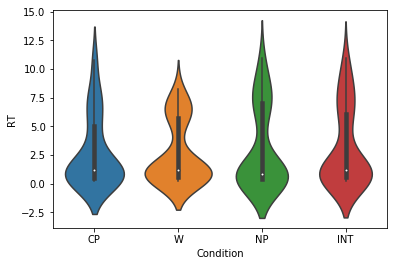

In [132]:
# plot RT for all participants
sns.violinplot(x='Condition', y='RT', data=data)

C:\Users\lauri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


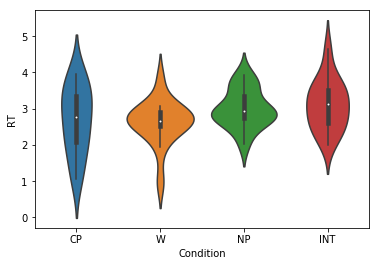

In [122]:
# plot mean RT across conditions
av_rt = np.mean(rt,1)
data1 = pd.DataFrame(av_rt, columns= ['RT'])
data2 = data1.join(input_list.Condition)
sns.violinplot(x='Condition', y='RT', data=data2)

# Linear regression
I am analysing the time it takes to complete the utterance, even if normally I would be interested in onset time of production and length of production. As to have that info I would have to use praat, I use RTs to move to the next trial as example to analyse data.

In [133]:
# linear regression
X = pd.get_dummies(data2['Condition'])  # this syntax lets us select multiple columns from the dataframe
y = data2['RT']
model = linear_model.LinearRegression()  # instantiate a linear model
model.fit(X, y)  # fit the model betas
y_predicted = model.predict(X)  # predict y from X
r2 = r2_score(y, y_predicted)  # calculate model R-squared
print(f'R-squared is {r2}')

R-squared is 0.08068355002275274
